In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [6]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

## Load basic data

In [7]:
ticker = 'IAU'
data = fat.get_price_data(ticker)

Loaded data for IAU: 2005-01-28 to 2018-02-16.


In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800


## Create Features

We're going to try to be predicting tomorrow's closing price, so add it as a column.

In [9]:
data['Tomorrow Adj Close'] = data['Adj Close'].shift(-1)

In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close
Date,,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200,12.76
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100,12.98
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800,12.99
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600,12.95
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800,NaN


We'll also add google trends for searches for  "gold price usd"

In [18]:
search = "gold price usd"
trends = fat.get_google_trends_df(data, search)

In [19]:
trends.tail()

,gold price usd,Days since updated gold price usd
date,,
2018-01-28,80.0,27
2018-01-29,80.0,28
2018-01-30,80.0,29
2018-01-31,80.0,30
2018-02-01,72.0,0


In [13]:
#related_queries

In [20]:
data = pd.DataFrame.join(data, trends)

In [21]:
data = data.dropna()
data[-14:]

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close,gold price usd,Days since updated gold price usd
Date,,,,,,,,,
2018-01-12,12.76,12.87,12.73,12.86,12.86,13305400,12.86,80.0,11.0
2018-01-16,12.82,12.87,12.79,12.86,12.86,7295900,12.77,80.0,15.0
2018-01-17,12.84,12.88,12.74,12.77,12.77,22220900,12.75,80.0,16.0
2018-01-18,12.79,12.80,12.73,12.75,12.75,18560300,12.78,80.0,17.0
2018-01-19,12.80,12.83,12.78,12.78,12.78,6918900,12.81,80.0,18.0
2018-01-22,12.81,12.83,12.78,12.81,12.81,6715900,12.88,80.0,21.0
2018-01-23,12.81,12.89,12.78,12.88,12.88,11162200,13.05,80.0,22.0
2018-01-24,13.00,13.08,12.98,13.05,13.05,15587600,12.94,80.0,23.0
2018-01-25,13.03,13.11,12.89,12.94,12.94,19944800,12.97,80.0,24.0


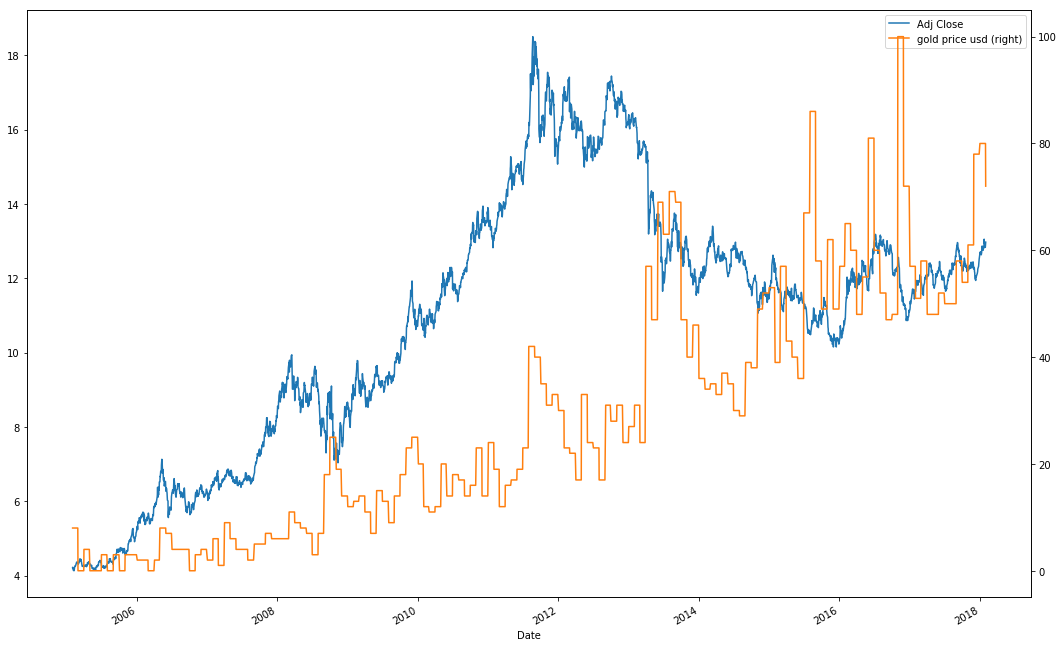

In [23]:
plot_data = data[['Adj Close', search]]
plot_data.plot(secondary_y = [search])

Add separate columns for various date parts.

In [24]:
data = data.reset_index()
add_datepart(data, 'Date', drop=False)
data = data.set_index('Date')

In [25]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close,gold price usd,Days since updated gold price usd,Year,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-26,12.98,13.01,12.95,12.97,12.97,14350800,12.88,80.0,25.0,2018,...,26,4,26,False,False,False,False,False,False,1516924800
2018-01-29,12.92,12.92,12.84,12.88,12.88,7974300,12.83,80.0,28.0,2018,...,29,0,29,False,False,False,False,False,False,1517184000
2018-01-30,12.94,12.95,12.83,12.83,12.83,9532200,12.92,80.0,29.0,2018,...,30,1,30,False,False,False,False,False,False,1517270400
2018-01-31,12.90,12.94,12.79,12.92,12.92,20848500,12.97,80.0,30.0,2018,...,31,2,31,True,False,False,False,False,False,1517356800
2018-02-01,12.88,12.97,12.86,12.97,12.97,13352000,12.80,72.0,0.0,2018,...,1,3,32,False,True,False,False,False,False,1517443200


Add in columns for several Simple Moving Averages for various periods of days.

In [27]:
sma_pct_diff = fat.get_sma_pct_diff_df(data, 'Adj Close')
del sma_pct_diff['Adj Close']
data = pd.DataFrame.join(data, sma_pct_diff)

In [33]:
data = data.dropna()

In [34]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow Adj Close,gold price usd,Days since updated gold price usd,Year,...,Is_year_end,Is_year_start,Elapsed,pct diff Adj Close SMA3,pct diff Adj Close SMA5,pct diff Adj Close SMA10,pct diff Adj Close SMA20,pct diff Adj Close SMA50,pct diff Adj Close SMA100,pct diff Adj Close SMA200
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-26,12.98,13.01,12.95,12.97,12.97,14350800,12.88,80.0,25.0,2018,...,False,False,1516924800,-0.128337,0.309358,0.800497,1.725490,4.327542,4.352723,5.642980
2018-01-29,12.92,12.92,12.84,12.88,12.88,7974300,12.83,80.0,28.0,2018,...,False,False,1517184000,-0.386698,-0.494438,0.085477,0.845600,3.508687,3.629444,4.886848
2018-01-30,12.94,12.95,12.83,12.83,12.83,9532200,12.92,80.0,29.0,2018,...,False,False,1517270400,-0.491210,-0.804082,-0.279807,0.328433,3.015802,3.227156,4.461389
2018-01-31,12.90,12.94,12.79,12.92,12.92,20848500,12.97,80.0,30.0,2018,...,False,False,1517356800,0.336526,0.092966,0.302772,0.933557,3.633593,3.954620,5.169761
2018-02-01,12.88,12.97,12.86,12.97,12.97,13352000,12.80,72.0,0.0,2018,...,False,False,1517443200,0.490702,0.433638,0.519259,1.193727,3.944606,4.355242,5.552707


In [35]:
DataFrameSummary(data).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Open,3075,11.2798,3.13554,4.663,9.001,11.78,12.9,18.51,3075,1606,0,0%,numeric
High,3075,11.3391,3.14613,4.68,9.0765,11.82,12.96,18.63,3075,1623,0,0%,numeric
Low,3075,11.2141,3.12339,4.651,8.9305,11.72,12.85,18.25,3075,1630,0,0%,numeric
Close,3075,11.2792,3.13566,4.664,9.013,11.78,12.895,18.5,3075,1631,0,0%,numeric
Adj Close,3075,11.2792,3.13566,4.664,9.013,11.78,12.895,18.5,3075,1631,0,0%,numeric
Volume,3075,4.96951e+06,4.588e+06,135000,2.11415e+06,3.8351e+06,6.35155e+06,6.99811e+07,3075,2904,0,0%,numeric
Tomorrow Adj Close,3075,11.2818,3.13351,4.664,9.015,11.78,12.895,18.5,3075,1630,0,0%,numeric
gold price usd,3075,29.935,22.3908,0,11,24,48,100,3075,65,0,0%,numeric
Days since updated gold price usd,3075,14.7616,8.75017,0,7,15,22,30,3075,31,0,0%,numeric
Year,3075,2011.48,3.52928,2005,2008,2011,2015,2018,3075,14,0,0%,numeric


In [36]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Tomorrow Adj Close', 'gold price usd',
       'Days since updated gold price usd', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'pct diff Adj Close SMA3', 'pct diff Adj Close SMA5',
       'pct diff Adj Close SMA10', 'pct diff Adj Close SMA20',
       'pct diff Adj Close SMA50', 'pct diff Adj Close SMA100',
       'pct diff Adj Close SMA200'],
      dtype='object')

Break the columns up into "category variables" and "continuous variables".

In [46]:
cat_vars = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Days since updated gold price usd',
            'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

contin_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'gold price usd', 'Elapsed',
               'pct diff Adj Close SMA3', 'pct diff Adj Close SMA5', 'pct diff Adj Close SMA10', 'pct diff Adj Close SMA20', 
               'pct diff Adj Close SMA50', 'pct diff Adj Close SMA100', 'pct diff Adj Close SMA200']

In [47]:
print(f'len(cat_vars) = {len(cat_vars)}')
print(f'len(contin_vars) = {len(contin_vars)}')
print(f'len(data.columns) = {len(data.columns)}')
assert(len(data.columns) == (len(cat_vars) + len(contin_vars) + 1))

len(cat_vars) = 13
len(contin_vars) = 15
len(data.columns) = 29


Split data into train and test sets.

In [48]:
data_len = len(data)
train_len = int(data_len * .8)
joined = data[:train_len]
joined_test = data[train_len:]
del joined_test['Tomorrow Adj Close']

In [ ]:
#train.tail().T

In [ ]:
#test.head().T

In [ ]:
#test.tail().T

In [49]:
dep = 'Tomorrow Adj Close'
joined = joined.reset_index()
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [52]:
joined.tail().T

,2455,2456,2457,2458,2459
Year,2015,2015,2015,2015,2015
Month,8,8,8,8,8
Week,34,34,34,34,35
Day,18,19,20,21,24
Dayofweek,1,2,3,4,0
Dayofyear,230,231,232,233,236
Days since updated gold price usd,17,18,19,20,23
Is_month_end,False,False,False,False,False
Is_month_start,False,False,False,False,False
Is_quarter_end,False,False,False,False,False


In [50]:
joined_test[dep] = 0
joined_test = joined_test.reset_index()
joined_test.head().T

C:\Users\matth\AppData\Local\conda\conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4
Date,2015-08-25 00:00:00,2015-08-26 00:00:00,2015-08-27 00:00:00,2015-08-28 00:00:00,2015-08-31 00:00:00
Open,11.09,10.87,10.83,10.9,10.91
High,11.1,10.9,10.9,11.02,10.98
Low,10.96,10.8,10.8,10.9,10.9
Close,11.02,10.87,10.85,10.95,10.98
Adj Close,11.02,10.87,10.85,10.95,10.98
Volume,5664200,2856700,5556200,2215900,2336200
gold price usd,86,86,86,86,86
Days since updated gold price usd,24,25,26,27,30
Year,2015,2015,2015,2015,2015


In [53]:
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date']].copy()

In [54]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [55]:
apply_cats(joined_test, joined)

We're going to run on full sample size.

In [56]:
samp_size = len(joined)
joined_samp = joined.set_index("Date")

We can now process our data...

In [57]:
df, y, nas, mapper = proc_df(joined_samp, dep, do_scale=True)
yl = np.log(y)

In [58]:
df.head(2)

,Year,Month,Week,Day,Dayofweek,Dayofyear,Days since updated gold price usd,Is_month_end,Is_month_start,Is_quarter_end,...,Volume,gold price usd,Elapsed,pct diff Adj Close SMA3,pct diff Adj Close SMA5,pct diff Adj Close SMA10,pct diff Adj Close SMA20,pct diff Adj Close SMA50,pct diff Adj Close SMA100,pct diff Adj Close SMA200
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-14,1,11,46,14,1,317,14,1,1,1,...,-1.018254,-1.095354,-1.732802,-0.015480,0.164418,0.393300,0.013122,-0.044330,0.354916,0.260992
2005-11-15,1,11,46,15,2,318,15,1,1,1,...,-0.972090,-1.095354,-1.731831,-0.119303,-0.028336,0.293321,0.019721,-0.070484,0.341709,0.252864


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [59]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

## Deep Learning

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [60]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [ ]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

Create categorical variables.

In [61]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('Year', 12),
 ('Month', 13),
 ('Week', 54),
 ('Day', 32),
 ('Dayofweek', 6),
 ('Dayofyear', 366),
 ('Days since updated gold price usd', 32),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('Is_quarter_end', 3),
 ('Is_quarter_start', 3),
 ('Is_year_end', 3),
 ('Is_year_start', 2)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [62]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(12, 6),
 (13, 7),
 (54, 27),
 (32, 16),
 (6, 3),
 (366, 50),
 (32, 16),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (2, 1)]

Find learning rate.

In [ ]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [ ]:
m.lr_find()

In [ ]:
m.sched.plot(100)

### Sample

In [ ]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [ ]:
m.fit(lr, 3, metrics=[exp_rmspe])